# Exploratory Analysis with Linear Regressions

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


## conclusions 1: suicide rate vs Year¶


In [2]:
suicide= pd.read_csv('datasets_7733_10953_suicide-rates-by-country.csv')
suicide.head(5)

,Entity,Code,Year,"suicide rate (age-adjusted suicides per 100,000 people)"
0,Afghanistan,AFG,2002,6.867054
1,Afghanistan,AFG,2004,6.684385
2,Afghanistan,AFG,2005,6.684385
3,Albania,ALB,2002,2.792918
4,Albania,ALB,2004,7.699330


In [3]:
suicide.iloc[25]

Entity                                                     Argentina
Code                                                             ARG
Year                                                            1979
suicide rate (age-adjusted suicides per 100,000 people)      6.83879
Name: 25, dtype: object

In [4]:
suicide.describe()

,Year,"suicide rate (age-adjusted suicides per 100,000 people)"
count,2843.000000,2843.000000
mean,1985.513542,11.950237
std,15.808386,7.749463
min,1950.000000,0.038377
25%,1973.000000,6.221588
50%,1988.000000,10.640970
75%,2000.000000,16.100905
max,2005.000000,44.352120


In [5]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 4 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Entity                                                   2843 non-null   object 
 1   Code                                                     2843 non-null   object 
 2   Year                                                     2843 non-null   int64  
 3   suicide rate (age-adjusted suicides per 100,000 people)  2843 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 89.0+ KB


In [6]:
X = suicide['suicide rate (age-adjusted suicides per 100,000 people)'].values
y = suicide['Year'].values


In [7]:
X

array([ 6.867054  ,  6.6843853 ,  6.6843853 , ...,  7.541058  ,
       13.90526676, 13.90526676])

In [8]:
y

array([2002, 2004, 2005, ..., 2002, 2004, 2005])

In [9]:
X = X.reshape(-1,1) 
X

array([[ 6.867054  ],
       [ 6.6843853 ],
       [ 6.6843853 ],
       ...,
       [ 7.541058  ],
       [13.90526676],
       [13.90526676]])

In [10]:
# y = y.reshape(-1,1) 
# y

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.2, test_size=0.2 ,random_state=1000)


In [12]:
x_train.shape

(568, 1)

In [13]:
x_test.shape


(569, 1)

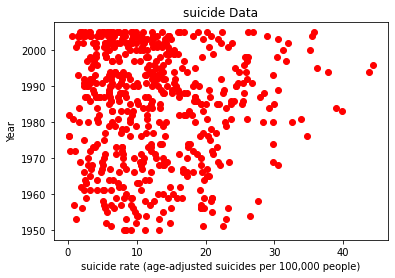

In [14]:
plt.scatter(x_train, y_train, color='red')
plt.xlabel('suicide rate (age-adjusted suicides per 100,000 people)')
plt.ylabel('Year')
plt.title('suicide Data')
plt.show()

In [15]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [16]:
y_predict = model.predict(x_test)
#y_test

In [17]:
#y_predict

In [18]:
country_suicide_score= np.array([7.5]).reshape(-1,1)
country_suicide_score

array([[7.5]])

In [19]:
model.predict(country_suicide_score)


array([1984.51461292])

In [20]:
model.score(x_train, y_train)*100


0.000430094579007001

In [21]:
model.score(x_test, y_test)*100


-1.2180953782913395

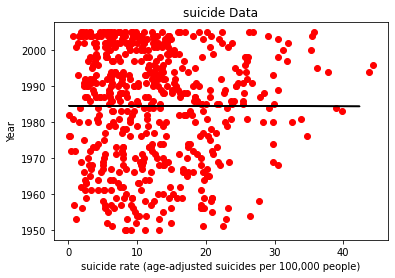

In [22]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_test, y_predict, color='black')
plt.xlabel('suicide rate (age-adjusted suicides per 100,000 people)')
plt.ylabel('Year')
plt.title('suicide Data')
plt.show()

## conclusions 2: Measles in all_country by Year¶


In [23]:
Life_Expectancy_Data= pd.read_csv('datasets_12603_17232_Life Expectancy Data.csv')
Life_Expectancy_Data.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [24]:
Life_Expectancy_Data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [25]:
Life_Expectancy_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [26]:
all_country=Life_Expectancy_Data[['Country','Year','Measles ','percentage expenditure']]

In [27]:
all_country

,Country,Year,Measles,percentage expenditure
0,Afghanistan,2015,1154,71.279624
1,Afghanistan,2014,492,73.523582
2,Afghanistan,2013,430,73.219243
3,Afghanistan,2012,2787,78.184215
4,Afghanistan,2011,3013,7.097109
...,...,...,...,...
2933,Zimbabwe,2004,31,0.000000
2934,Zimbabwe,2003,998,0.000000
2935,Zimbabwe,2002,304,0.000000
2936,Zimbabwe,2001,529,0.000000


In [28]:
all_country.head(5)

,Country,Year,Measles,percentage expenditure
0,Afghanistan,2015,1154,71.279624
1,Afghanistan,2014,492,73.523582
2,Afghanistan,2013,430,73.219243
3,Afghanistan,2012,2787,78.184215
4,Afghanistan,2011,3013,7.097109


In [29]:
X = all_country['Measles '].values
y = all_country['Year'].values

In [30]:
X = X.reshape(-1,1)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.2, test_size=0.2 ,random_state=1000)


In [32]:
x_test.shape


(588, 1)

In [33]:
#x_train

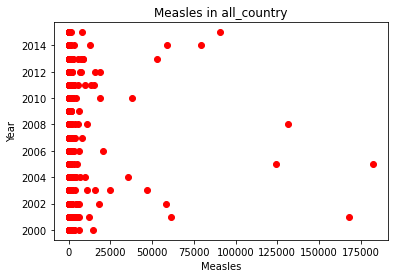

In [34]:
plt.scatter(x_train, y_train, color='red')
plt.xlabel('Measles')
plt.ylabel('Year')
plt.title('Measles in all_country')
plt.show()

In [35]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [36]:
y_predict = model.predict(x_test)
#y_test

In [37]:
#y_predict

In [38]:
model.score(x_train, y_train)*100

0.141629419164635

In [39]:
model.score(x_test, y_test)*100

0.36305786973376275

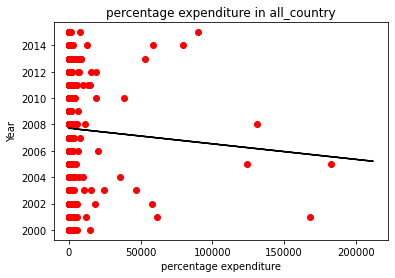

In [40]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_test, y_predict, color='black')
plt.xlabel('percentage expenditure')
plt.ylabel('Year')
plt.title('percentage expenditure in all_country')
plt.show()

## conclusions 3:  percentage expenditure in all_country by Year¶


In [41]:
X = all_country['percentage expenditure'].values
y = all_country['Year'].values

In [42]:
X = X.reshape(-1,1)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.2, test_size=0.2 ,random_state=1000)

In [44]:
x_test.shape

(588, 1)

In [45]:
#x_train

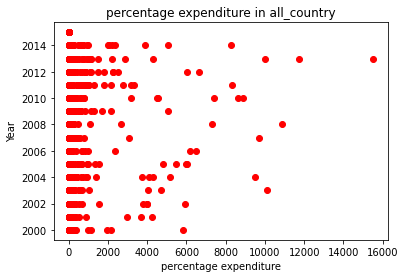

In [46]:
plt.scatter(x_train, y_train, color='red')
plt.xlabel('percentage expenditure')
plt.ylabel('Year')
plt.title('percentage expenditure in all_country')
plt.show()


In [47]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [48]:
y_predict = model.predict(x_test)
#y_test

In [49]:
#y_predict

In [50]:
model.score(x_train, y_train)*100

0.17687172662895767

In [51]:
model.score(x_test, y_test)*100

-0.1516967122835

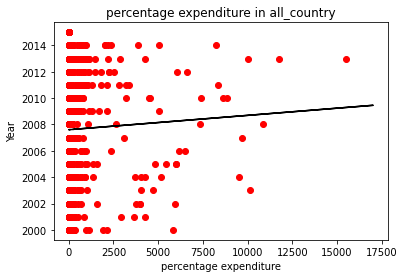

In [52]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_test, y_predict, color='black')
plt.xlabel('percentage expenditure')
plt.ylabel('Year')
plt.title('percentage expenditure in all_country')
plt.show()